In [19]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split
from collections import OrderedDict

#scikit learn library 
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz






In [20]:
print(os.listdir())

['TrainingData 3.csv', 'foo.csv', 'Floor_model_file', 'RandomForest_floor.pkl', 'app.yaml', '.DS_Store', 'ValidationData.csv', 'Loading the dataset.ipynb', 'BID_model_file', 'gb_building.pkl', 'Validation.ipynb', 'RandomForest_building.pkl', 'spamtest.csv', 'trainingData.csv', 'webapp', 'svm_lat.pkl', 'RandomForest_long.pkl', 'RandomForest_lat.pkl', 'Interview.ipynb', 'svm_building.pkl', 'gb_long.pkl', 'gb_lat.pkl', 'Test-File.csv', 'Email_spam_filtering.py', 'Spam_filtering.ipynb', 'testdata.csv', 'train.py', 'svm_long.pkl', '.ipynb_checkpoints', 'svm_floor.pkl', 'flask-d3-wordcloud', 'countvect', 'model_file', 'tests.py', 'main.py', 'gb_floor.pkl', 'spam.csv', 'vector_countvect']


In [21]:
df = pd.read_csv('trainingData.csv')
display(df.describe())
print(df.shape)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


(19937, 529)


In [22]:
df.isnull().sum()

WAP001              0
WAP002              0
WAP003              0
WAP004              0
WAP005              0
WAP006              0
WAP007              0
WAP008              0
WAP009              0
WAP010              0
WAP011              0
WAP012              0
WAP013              0
WAP014              0
WAP015              0
WAP016              0
WAP017              0
WAP018              0
WAP019              0
WAP020              0
WAP021              0
WAP022              0
WAP023              0
WAP024              0
WAP025              0
WAP026              0
WAP027              0
WAP028              0
WAP029              0
WAP030              0
                   ..
WAP500              0
WAP501              0
WAP502              0
WAP503              0
WAP504              0
WAP505              0
WAP506              0
WAP507              0
WAP508              0
WAP509              0
WAP510              0
WAP511              0
WAP512              0
WAP513              0
WAP514    

In [23]:
df.isnull().values.any()

False

In [24]:
print("Unique Vales from Feature FLOOR {}\n".format(df["FLOOR"].unique()))
print("Unique Vales from Feature BUILDINGID {}\n".format(df["BUILDINGID"].unique()))
print("Unique Vales from Feature SPACEID {}\n".format(df["SPACEID"].unique()))
print("Unique Vales from Feature RELATIVEPOSITION {}\n".format(df["RELATIVEPOSITION"].unique()))

Unique Vales from Feature FLOOR [2 0 3 4 1]

Unique Vales from Feature BUILDINGID [1 0 2]

Unique Vales from Feature SPACEID [106 103 102 122 105 101 112 104 110 108 109 111 107  15  29 117  16  28
  22  10   2   4   3   5   6   9  27   8   7  26  18 216  17 217 247 248
 246 245 244 243 242 241 240 201 202 204 203 205 207 206 209 211 208 210
 212 214 213 215 121 219 221 222 218 220 250 223 225 224 229 226 227 228
 233 231 230 232 236 235 234 237 238 239 141 140 143 113 114 116 115 120
 118 128 119 129 125 124 131 127 132 126 133 134 137 135 136 253 254 123
 130 138 139 142 146 147 249 144   1  30  25  13  12  11  14]

Unique Vales from Feature RELATIVEPOSITION [2 1]



In [25]:
df_BuildingID = df['BUILDINGID'].values
df_Floor=df['FLOOR'].values
df_Longitude = df['LONGITUDE'].values
df_Latitude = df['LATITUDE'].values


In [26]:
df_data=df.drop(["LONGITUDE", "LATITUDE","FLOOR","BUILDINGID","SPACEID","RELATIVEPOSITION","USERID","PHONEID","TIMESTAMP"], axis=1)

In [27]:
scaler = StandardScaler()
df_data = scaler.fit_transform(df_data)

In [28]:
xtrain, xtest, ytrain1, ytest1 = train_test_split(df_data,df_BuildingID,test_size=1/3, random_state=0)
xtrain, xtest, ytrain2, ytest2 = train_test_split(df_data,df_Floor,test_size=1/3, random_state=0)
xtrain, xtest, ytrain3, ytest3 = train_test_split(df_data,df_Longitude,test_size=1/3, random_state=0)
xtrain, xtest, ytrain4, ytest4 = train_test_split(df_data,df_Latitude,test_size=1/3, random_state=0)




In [29]:
#Building Model for Building ID
predictions=dict()
GND_BID = GaussianNB()
BNB_BID = BernoulliNB () 
rf_model_BID = RandomForestClassifier()
svm_model_BID = SVC(verbose=True)
gbdt_model_BID = GradientBoostingClassifier()


GND_BID.fit(xtrain,ytrain1)
BNB_BID.fit(xtrain,ytrain1)
rf_model_BID.fit(xtrain,ytrain1)
svm_model_BID.fit(xtrain,ytrain1)
gbdt_model_BID.fit(xtrain,ytrain1)



[LibSVM]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [30]:
predicted_labels_GNB_BID = GND_BID.predict(xtest)
predictions['GNB']=accuracy_score(predicted_labels_GNB_BID,ytest1) *100

predicted_labels_BNB_BID = BNB_BID.predict(xtest)
predictions['BNB']=accuracy_score(predicted_labels_BNB_BID,ytest1) *100
predicted_labels_rf_BID = rf_model_BID.predict(xtest)
predictions['RF']=accuracy_score(predicted_labels_rf_BID,ytest1) *100
predicted_labels_svm_BID = svm_model_BID.predict(xtest)
predictions['SVM']=accuracy_score(predicted_labels_svm_BID,ytest1) *100
predicted_labels_gbdt_BID = gbdt_model_BID.predict(xtest)
predictions['GBDT']=accuracy_score(predicted_labels_svm_BID,ytest1) *100






,Algorithms,Percentage
0,GNB,99.804394
1,BNB,99.699067
2,RF,99.789347
3,SVM,99.548601
4,GBDT,99.548601


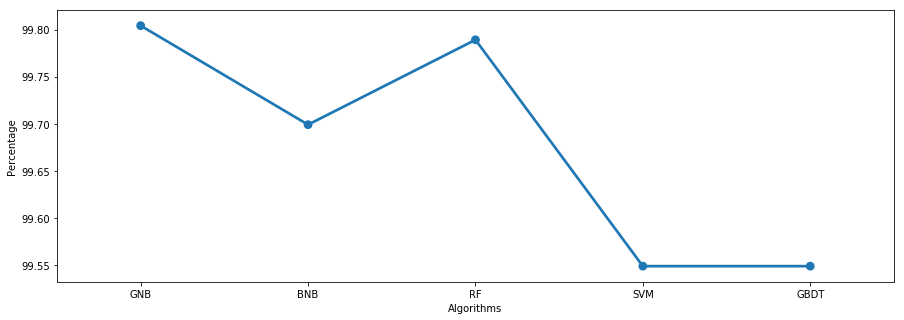

In [31]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
df=pd.DataFrame(list(predictions.items()),columns=['Algorithms','Percentage'])
display(df)
sns.pointplot(x="Algorithms", y="Percentage", data=df,ax=ax1);

In [32]:
#Building Model for Floor ID
predictions_floorID=dict()
GND_FID = GaussianNB()
BNB_FID = BernoulliNB () 
rf_model_FID = RandomForestClassifier()
svm_model_FID = SVC(verbose=True)
gbdt_model_FID = GradientBoostingClassifier()


GND_FID.fit(xtrain,ytrain2)
BNB_FID.fit(xtrain,ytrain2)
rf_model_FID.fit(xtrain,ytrain2)
svm_model_FID.fit(xtrain,ytrain2)
gbdt_model_FID.fit(xtrain,ytrain2)



[LibSVM]

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [33]:
predicted_labels_GNB_FID = GND_FID.predict(xtest)
predictions_floorID['GNB']=accuracy_score(predicted_labels_GNB_BID,ytest1) *100

predicted_labels_BNB_FID = BNB_FID.predict(xtest)
predictions_floorID['BNB']=accuracy_score(predicted_labels_BNB_BID,ytest1) *100
predicted_labels_rf_FID = rf_model_FID.predict(xtest)
predictions_floorID['RF']=accuracy_score(predicted_labels_rf_BID,ytest1) *100
predicted_labels_svm_FID = svm_model_FID.predict(xtest)
predictions_floorID['SVM']=accuracy_score(predicted_labels_svm_BID,ytest1) *100
predicted_labels_gbdt_FID = gbdt_model_FID.predict(xtest)
predictions_floorID['GBDT']=accuracy_score(predicted_labels_svm_BID,ytest1) *100







,Algorithms,Percentage
0,GNB,99.804394
1,BNB,99.699067
2,RF,99.789347
3,SVM,99.548601
4,GBDT,99.548601


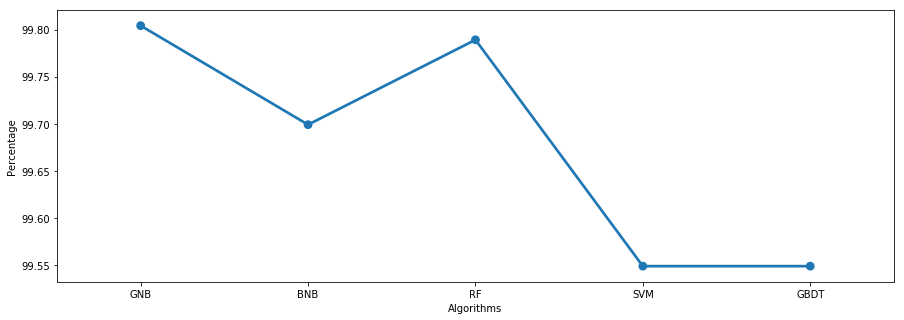

In [34]:
fig, (ax1) = plt.subplots(ncols=1, sharey=True,figsize=(15,5))
df=pd.DataFrame(list(predictions_floorID.items()),columns=['Algorithms','Percentage'])
display(df)
sns.pointplot(x="Algorithms", y="Percentage", data=df,ax=ax1);

In [35]:
print(accuracy_score(predicted_labels_BID,ytest1))
print(accuracy_score(predicted_labels_FLOOR,ytest2))
print(accuracy_score(predicted_labels_FLOOR_rf,ytest2))
print(accuracy_score(predicted_labels_FLOOR_svm,ytest2))
print(accuracy_score(predicted_labels_FLOOR_gdbt,ytest2))


NameError: name 'predicted_labels_BID' is not defined

In [36]:
np.unique(predicted_labels_BID)

NameError: name 'predicted_labels_BID' is not defined

In [37]:
np.unique(predicted_labels_FLOOR_rf)

NameError: name 'predicted_labels_FLOOR_rf' is not defined

In [38]:
np.unique(predicted_labels_FLOOR)

NameError: name 'predicted_labels_FLOOR' is not defined

In [39]:
xtest.shape

(6646, 520)

In [40]:
xtest.to_csv('testdata.csv',index=False)

AttributeError: 'numpy.ndarray' object has no attribute 'to_csv'

In [41]:
#serializing the model 
pickle.dump(clf1,open('BID_model_file',"wb"))
pickle.dump(rf_model,open('Floor_model_file',"wb"))

NameError: name 'clf1' is not defined

In [42]:
#loading the serialzied model
ser_clf = pickle.load(open('model_file','rb'))

In [43]:
df_test = pd.read_csv('testdata.csv')
df_test.head()

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
0,100,100,100,100,100,100,100,100,100,100,...,-94,100,100,100,100,100,100,100,100,100
1,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,-84,100,100,100
2,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
3,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100
4,100,100,100,100,100,100,100,100,100,100,...,100,100,100,100,100,100,100,100,100,100


In [44]:
predicted_values = ser_clf.predict(df_test)
np.unique(predicted_values)

array([0, 1, 2])

ValueError: Could not interpret input 'LONGITUDE'

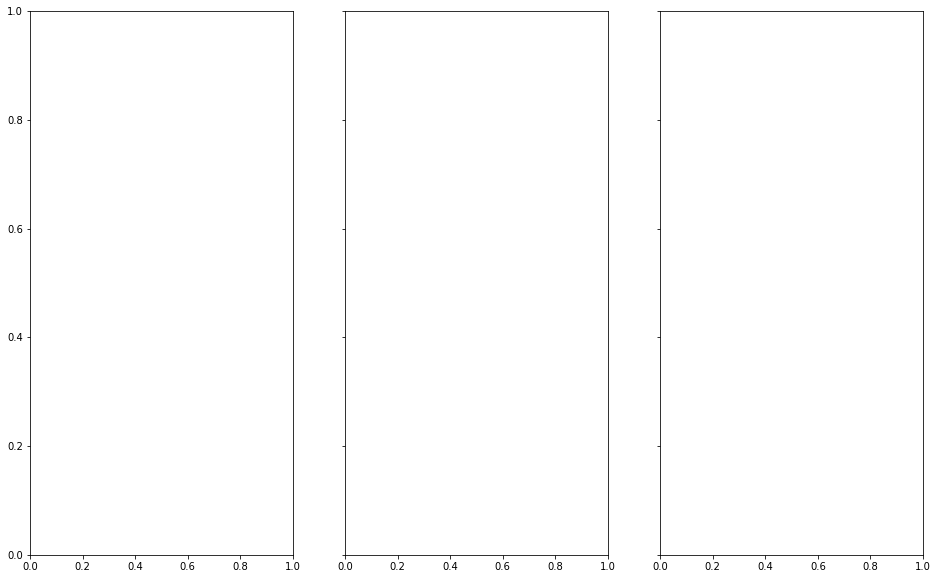

In [45]:
#EDA
import seaborn as sns
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(16,10))
sns.swarmplot(x="LONGITUDE", y="LATITUDE", hue="BUILDINGID", data=df,ax=ax1);
sns.stripplot(x="LONGITUDE", y="LATITUDE", hue="BUILDINGID", data=df,ax=ax2);
sns.pointplot(x="LONGITUDE", y="LATITUDE", hue="BUILDINGID", data=df,ax=ax3);

In [ ]:
#EDA
import seaborn as sns
fig, (ax1, ax2,ax3) = plt.subplots(ncols=3, sharey=True,figsize=(16,10))
sns.swarmplot(x="LONGITUDE", y="LATITUDE", hue="FLOOR", data=df,ax=ax1);
sns.stripplot(x="LONGITUDE", y="LATITUDE", hue="FLOOR", data=df,ax=ax2);
sns.pointplot(x="LONGITUDE", y="LATITUDE", hue="FLOOR", data=df,ax=ax3);

In [ ]:
#latitude Model 

#Building Model for Floor ID
predictions_floorID=dict()

rf_model_Lat = RandomForestRegressor()
svm_model_Lat = SVR(verbose=True)
gbdt_model_Lat = GradientBoostingRegressor()



rf_model_FID.fit(xtrain,ytrain3)
svm_model_FID.fit(xtrain,ytrain3)
gbdt_model_FID.fit(xtrain,ytrain3)




In [ ]:
#longitude Model 

#latitude Model 

#Building Model for Floor ID
predictions_floorID=dict()

rf_model_Long = RandomForestRegressor()
svm_model_Long = SVR(verbose=True)
gbdt_model_Long = GradientBoostingRegressor()



rf_model_Long.fit(xtrain,ytrain4)
svm_model_Long.fit(xtrain,ytrain4)
gbdt_model_Long.fit(xtrain,ytrain4)

